In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Training Image preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\jainj\OneDrive\Desktop\SIH\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\jainj\OneDrive\Desktop\SIH\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [9]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\jainj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [20]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [22]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Updated optimizer
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 0, 0, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 0, 0, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 0, 0, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 0)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,950,922 (22.70 MB)

 Trainable params: 5,950,922 (22.70 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(38, activation='softmax')  # Adjust number of classes as needed
])

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 359s 163ms/step - accuracy: 0.1676 - loss: 4.2719 - val_accuracy: 0.6160 - val_loss: 1.3817
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 343s 156ms/step - accuracy: 0.7113 - loss: 1.0255 - val_accuracy: 0.8263 - val_loss: 0.5925
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 321s 146ms/step - accuracy: 0.8778 - loss: 0.4113 - val_accuracy: 0.8725 - val_loss: 0.4356
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 318s 145ms/step - accuracy: 0.9341 - loss: 0.2125 - val_accuracy: 0.8958 - val_loss: 0.3593
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 320s 145ms/step - accuracy: 0.9624 - loss: 0.1194 - val_accuracy: 0.9040 - val_loss: 0.3429
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 329s 150ms/step - accuracy: 0.9754 - loss: 0.0767 - val_accuracy: 0.9012 - val_loss: 0.3771
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 385s 175ms/step - accuracy: 0.9807 - loss: 0.0613 - val_accuracy: 0.9087 - val_loss: 0.3733
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 347s 158ms/step - ac

## Evaluating Model

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 104s 47ms/step - accuracy: 0.9819 - loss: 0.0577
Training accuracy: 0.9836830496788025


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.8999 - loss: 0.4460
Validation accuracy: 0.9000682830810547


### Saving Model

In [28]:
cnn.save('trained_plant_disease_model.keras')

In [29]:
training_history.history #Return Dictionary of history

{'accuracy': [0.3283732831478119,
  0.7703819870948792,
  0.8945728540420532,
  0.9417881965637207,
  0.9651468992233276,
  0.9782488346099854,
  0.9822462201118469,
  0.9851909875869751,
  0.9888327717781067,
  0.9881356954574585],
 'loss': [2.723790407180786,
  0.7974901795387268,
  0.3487655222415924,
  0.18763506412506104,
  0.1095990389585495,
  0.06873110681772232,
  0.05704311281442642,
  0.04624662548303604,
  0.035669535398483276,
  0.03581393137574196],
 'val_accuracy': [0.6160368919372559,
  0.8262577056884766,
  0.8725244998931885,
  0.8958001136779785,
  0.9039949774742126,
  0.9012064933776855,
  0.9087184071540833,
  0.9201001524925232,
  0.9201570749282837,
  0.9000682830810547],
 'val_loss': [1.3816585540771484,
  0.5925314426422119,
  0.435565322637558,
  0.3593389391899109,
  0.34289655089378357,
  0.37710410356521606,
  0.3732566833496094,
  0.33351126313209534,
  0.32559236884117126,
  0.4550711512565613]}

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

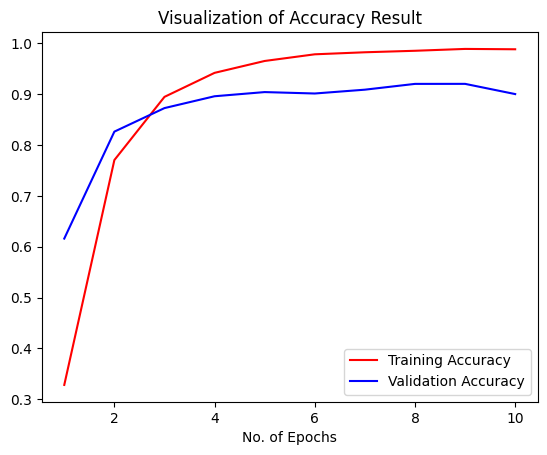

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\jainj\OneDrive\Desktop\SIH\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step


In [37]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [38]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [41]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.80      0.88       504
                                 Apple___Black_rot       0.93      0.95      0.94       497
                          Apple___Cedar_apple_rust       0.88      0.96      0.92       440
                                   Apple___healthy       0.93      0.86      0.90       502
                               Blueberry___healthy       0.92      0.93      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.93      0.95       421
                 Cherry_(including_sour)___healthy       0.96      0.96      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.84      0.87       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.88      0.